In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Kenya_FD.csv')

In [ ]:
df

,Company Name,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Status
0,C_1,2011,0.53,0.81,4.15,11.71,0.38,2.49,0.83,0.07,1.18,-0.09,0.21,0
1,C_2,2011,0.22,0.19,4.51,2.41,0.15,-2.46,-0.15,0.20,-0.03,0.47,0.25,0
2,C_3,2011,1.87,0.82,7.93,21.71,1.25,12.30,0.12,-0.04,0.39,-0.16,0.38,1
3,C_4,2011,2.88,0.68,4.68,3.37,2.37,161.36,0.40,0.05,0.46,-0.21,0.67,1
4,C_5,2011,1.64,1.11,3.48,5.50,1.10,86.64,0.48,-0.10,0.87,0.00,0.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,C_34,2021,1.80,0.64,2.37,3.05,1.09,1.90,0.36,-0.07,0.08,0.19,0.26,1
414,C_35,2021,0.78,2.93,9.53,62.99,0.25,-0.71,0.14,-0.06,-0.70,-0.21,-1.80,0
415,C_36,2021,2.52,2.45,5.97,13.73,1.33,67.35,0.12,-0.11,0.37,-0.13,0.27,1
416,C_37,2021,2.41,0.54,0.00,3.27,2.05,14.17,1.00,-0.17,0.24,-0.09,0.69,1


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  418 non-null    object 
 1   Year          418 non-null    int64  
 2   X1            418 non-null    float64
 3   X2            418 non-null    float64
 4   X3            418 non-null    float64
 5   X4            418 non-null    float64
 6   X5            418 non-null    float64
 7   X6            418 non-null    float64
 8   X7            418 non-null    float64
 9   X8            418 non-null    float64
 10  X9            418 non-null    float64
 11  X10           418 non-null    float64
 12  X11           418 non-null    float64
 13  Status        418 non-null    int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 45.8+ KB
None


In [ ]:
df.columns

Index(['Company Name', 'Year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'Status'],
      dtype='object')

In [ ]:
df.rename(columns = {'Company Name':'IDRSSD'}, inplace = True)

In [ ]:
df_failure = df[df.Status == 0.0]

In [ ]:
df_failure

,IDRSSD,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Status
0,C_1,2011,0.53,0.81,4.15,11.71,0.38,2.49,0.83,0.07,1.18,-0.09,0.21,0
1,C_2,2011,0.22,0.19,4.51,2.41,0.15,-2.46,-0.15,0.20,-0.03,0.47,0.25,0
5,C_6,2011,0.93,1.30,3.73,9.30,0.32,2.67,0.18,-0.18,-0.08,-0.29,0.30,0
9,C_10,2011,0.50,0.32,4.64,4.20,0.28,-0.60,0.16,0.06,-0.03,-0.03,-0.17,0
10,C_11,2011,0.85,1.04,4.53,8.43,0.53,6.45,0.48,-0.09,0.62,-0.21,0.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,C_21,2021,0.90,0.75,6.80,6.49,0.57,11.01,0.33,-0.10,0.42,-0.24,0.14,0
403,C_24,2021,0.32,0.92,7.66,4.83,0.23,37.48,0.36,-0.16,0.43,-0.13,0.35,0
407,C_28,2021,0.56,0.91,12.69,11.91,0.49,10.73,0.49,-0.07,0.88,-0.11,0.60,0
410,C_31,2021,1.00,1.13,4.24,4.06,0.74,3.00,0.60,-0.09,0.29,-0.02,0.27,0


In [ ]:
df_failure['Year'] = pd.to_datetime(df_failure['Year'],format='%Y')

<ipython-input-9-cb98a8f1a61d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_failure['Year'] = pd.to_datetime(df_failure['Year'],format='%Y')


In [ ]:
df_failure['Year']

0     2011-01-01
1     2011-01-01
5     2011-01-01
9     2011-01-01
10    2011-01-01
         ...    
400   2021-01-01
403   2021-01-01
407   2021-01-01
410   2021-01-01
414   2021-01-01
Name: Year, Length: 137, dtype: datetime64[ns]

In [ ]:
train_end_timestamp = pd.Timestamp('2016-01-01')
validation_end_timestamp = pd.Timestamp('2019-01-01')
train_IDRSSD = df_failure[df_failure.Year <= train_end_timestamp].IDRSSD.values
validation_IDRSSD = df_failure[(df_failure.Year> train_end_timestamp) & (df_failure.Year <= validation_end_timestamp)].IDRSSD.values
test_IDRSSD = df_failure[df_failure.Year > validation_end_timestamp].IDRSSD.values

In [ ]:
train_IDRSSD

array(['C_1', 'C_2', 'C_6', 'C_10', 'C_11', 'C_12', 'C_13', 'C_15',
       'C_18', 'C_21', 'C_23', 'C_24', 'C_28', 'C_31', 'C_33', 'C_34',
       'C_35', 'C_1', 'C_2', 'C_6', 'C_10', 'C_11', 'C_12', 'C_14',
       'C_15', 'C_18', 'C_21', 'C_23', 'C_24', 'C_28', 'C_31', 'C_33',
       'C_34', 'C_35', 'C_1', 'C_2', 'C_6', 'C_8', 'C_10', 'C_11', 'C_12',
       'C_14', 'C_15', 'C_18', 'C_21', 'C_23', 'C_24', 'C_28', 'C_29',
       'C_31', 'C_33', 'C_34', 'C_35', 'C_2', 'C_6', 'C_10', 'C_11',
       'C_12', 'C_14', 'C_15', 'C_18', 'C_21', 'C_24', 'C_29', 'C_31',
       'C_33', 'C_34', 'C_35', 'C_2', 'C_10', 'C_11', 'C_12', 'C_15',
       'C_18', 'C_21', 'C_24', 'C_28', 'C_31', 'C_34', 'C_35', 'C_10',
       'C_12', 'C_13', 'C_14', 'C_15', 'C_18', 'C_21', 'C_24', 'C_28',
       'C_35'], dtype=object)

In [ ]:
print(train_IDRSSD.shape, validation_IDRSSD.shape, test_IDRSSD.shape)

(90,) (29,) (18,)


In [ ]:
train_df = df[df.IDRSSD.isin(train_IDRSSD)]
validation_df = df[df.IDRSSD.isin(validation_IDRSSD)]
test_df = df[df.IDRSSD.isin(test_IDRSSD)]
#This code creates train, validation, and test sets of IDRSSD values 
#from the dataframe df_failure based on the timestamp of each failure

In [ ]:
validation_df

,IDRSSD,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Status
0,C_1,2011,0.53,0.81,4.15,11.71,0.38,2.49,0.83,0.07,1.18,-0.09,0.21,0
8,C_9,2011,5.52,0.12,0.00,0.00,0.00,0.00,0.28,-0.14,0.35,-0.02,0.12,1
9,C_10,2011,0.50,0.32,4.64,4.20,0.28,-0.60,0.16,0.06,-0.03,-0.03,-0.17,0
10,C_11,2011,0.85,1.04,4.53,8.43,0.53,6.45,0.48,-0.09,0.62,-0.21,0.14,0
11,C_12,2011,0.14,0.06,2.93,1.79,0.08,-31.46,-0.37,-0.03,-0.03,0.29,0.56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,C_21,2021,0.90,0.75,6.80,6.49,0.57,11.01,0.33,-0.10,0.42,-0.24,0.14,0
407,C_28,2021,0.56,0.91,12.69,11.91,0.49,10.73,0.49,-0.07,0.88,-0.11,0.60,0
410,C_31,2021,1.00,1.13,4.24,4.06,0.74,3.00,0.60,-0.09,0.29,-0.02,0.27,0
412,C_33,2021,1.50,0.44,3.73,4.43,1.26,5.72,0.77,-0.09,0.15,-0.18,0.21,1


In [ ]:
test_df

,IDRSSD,Year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Status
0,C_1,2011,0.53,0.81,4.15,11.71,0.38,2.49,0.83,0.07,1.18,-0.09,0.21,0
10,C_11,2011,0.85,1.04,4.53,8.43,0.53,6.45,0.48,-0.09,0.62,-0.21,0.14,0
13,C_14,2011,1.50,0.05,0.70,0.45,0.93,-0.91,0.01,-0.32,-0.66,0.30,-1.37,1
14,C_15,2011,0.57,0.08,0.05,0.83,0.06,-0.05,0.46,-0.02,0.01,-0.23,-0.57,0
17,C_18,2011,0.32,0.43,26.66,6.45,0.29,-0.81,0.18,0.10,0.06,-0.25,-0.86,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,C_21,2021,0.90,0.75,6.80,6.49,0.57,11.01,0.33,-0.10,0.42,-0.24,0.14,0
403,C_24,2021,0.32,0.92,7.66,4.83,0.23,37.48,0.36,-0.16,0.43,-0.13,0.35,0
407,C_28,2021,0.56,0.91,12.69,11.91,0.49,10.73,0.49,-0.07,0.88,-0.11,0.60,0
410,C_31,2021,1.00,1.13,4.24,4.06,0.74,3.00,0.60,-0.09,0.29,-0.02,0.27,0


In [ ]:
print(train_df.shape, validation_df.shape, test_df.shape) #(no. of rows, no.of columns)

(220, 14) (165, 14) (110, 14)


In [ ]:
train_df.columns

Index(['IDRSSD', 'Year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'Status'],
      dtype='object')

In [ ]:
def create_data_by_group(group:  pd.DataFrame, freq=1):
    if group.shape[0] < freq:
        return
    group = group.copy()
    label_collection = group['Status'].values
    group.drop(['IDRSSD', 'Year', 'Status'], axis=1, inplace=True)
    generated_columns = []
    for i in range(freq):
        generated_columns.extend([item + '_' + str(i + 1) for item in group.columns])
    generated_data = []
    for i in range(len(group) - freq + 1):
        tmp = group[i: (i + freq)].values
        tmp = tmp.reshape((1,-1))
        assert tmp.shape[1] == len(generated_columns)
        tmp = pd.DataFrame(tmp, columns=generated_columns)
        if 1. in label_collection[i: (i + freq)]:
            tmp['Status'] = 1
        else:
            tmp['Status'] = 0
        generated_data.append(tmp)
    return pd.concat(generated_data)

In [ ]:
def create_data(df, freq):
    df = df.copy()
    grouped_df = df.groupby(['IDRSSD'])
    generated_data = []
    for _, group in grouped_df:
        tmp = create_data_by_group(group)
        if tmp is not None:
            generated_data.append(tmp)
    return pd.concat(generated_data)

In [ ]:
train_data = create_data(train_df, 1)
validation_data = create_data(validation_df, 1)
test_data = create_data(test_df, 1)

In [ ]:
train_data

,X1_1,X2_1,X3_1,X4_1,X5_1,X6_1,X7_1,X8_1,X9_1,X10_1,X11_1,Status
0,0.53,0.81,4.15,11.71,0.38,2.49,0.83,0.07,1.18,-0.09,0.21,0
0,0.73,0.68,4.13,6.87,0.63,2.24,0.79,0.13,0.49,-0.02,0.14,0
0,0.71,0.68,5.88,5.18,0.62,1.41,0.67,-0.15,0.40,0.21,0.12,0
0,1.09,1.07,9.87,6.72,0.93,0.00,0.47,-0.33,0.49,-0.24,0.26,1
0,1.50,1.21,9.24,7.38,1.23,0.00,0.49,-0.34,0.50,-0.44,0.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1.11,1.61,2.73,4.47,0.56,2.39,0.41,-0.15,0.11,-0.10,0.26,1
0,1.15,1.78,3.36,4.71,0.63,2.72,0.39,-0.24,-0.11,-0.15,0.42,1
0,1.38,1.98,4.19,5.60,0.81,12.08,0.35,-0.23,-0.05,-0.14,0.55,1
0,1.54,1.98,2.92,5.07,0.87,0.00,0.33,-0.02,0.27,-0.13,0.48,1


In [ ]:
test_data

,X1_1,X2_1,X3_1,X4_1,X5_1,X6_1,X7_1,X8_1,X9_1,X10_1,X11_1,Status
0,0.53,0.81,4.15,11.71,0.38,2.49,0.83,0.07,1.18,-0.09,0.21,0
0,0.73,0.68,4.13,6.87,0.63,2.24,0.79,0.13,0.49,-0.02,0.14,0
0,0.71,0.68,5.88,5.18,0.62,1.41,0.67,-0.15,0.40,0.21,0.12,0
0,1.09,1.07,9.87,6.72,0.93,0.00,0.47,-0.33,0.49,-0.24,0.26,1
0,1.50,1.21,9.24,7.38,1.23,0.00,0.49,-0.34,0.50,-0.44,0.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.91,3.03,11.67,193.27,0.36,98.32,0.17,-0.21,0.16,-0.11,-0.21,0
0,0.92,3.41,12.12,211.81,0.37,3.92,0.17,-0.21,0.18,-0.14,-0.43,0
0,0.59,4.00,0.00,0.00,0.26,2.05,0.17,-0.35,0.22,-0.17,-1.19,0
0,0.62,4.23,0.00,0.00,0.00,1.63,0.17,-0.03,0.02,-0.34,-1.20,0


In [ ]:
0.6*418

250.79999999999998

In [ ]:
train_data.Status.value_counts()

0    135
1     85
Name: Status, dtype: int64

In [ ]:
validation_data.Status.value_counts()

0    110
1     55
Name: Status, dtype: int64

In [ ]:
test_data.Status.value_counts()

0    90
1    20
Name: Status, dtype: int64

In [ ]:
pip install h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_data.columns

Index(['X1_1', 'X2_1', 'X3_1', 'X4_1', 'X5_1', 'X6_1', 'X7_1', 'X8_1', 'X9_1',
       'X10_1', 'X11_1', 'Status'],
      dtype='object')

In [ ]:
train_data.to_csv('kenya_train')
validation_data.to_csv('kenya_val')
test_data.to_csv('kenya_test')

Splitting Panel data as guided by: https://datascience.stackexchange.com/questions/77684/time-series-grouped-cross-validation/79655#79655


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import TimeSeriesSplit
# Generating dates
def pp(start, end, n):
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.DatetimeIndex((10**9*np.random.randint(start_u, end_u, n, dtype=np.int64)).view('M8[ns]'))

start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2019-01-01')

# First split by customer
rkf = RepeatedKFold(n_splits=3, n_repeats=5, random_state=42)
for train_firm, test_firm, val_firm in rkf.split(df['IDRSSD'].unique()):
    print("training/testing with firms : " + str(train_firm)+"/"+str(test_firm)+"/"+str(val_firm))

    # Then sort all the data (if not already sorted)
    sorted_df = df.sort_index()

    # Then do the time series split
    tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
    for train_index, test_index in tscv.split(sorted_df.values):
        df_train, df_test = sorted_df.iloc[train_index], sorted_df.iloc[test_index]

        # Keep the right firms for training/testing 
        df_train_final = pd.concat( [ df_train.groupby('IDRSSD').get_group(i) for i in train_firm ])
        df_test_final = pd.concat( [ df_test.groupby('IDRSSD').get_group(i) for i in test_firm ])

ValueError: ignored

In [ ]:
df_train_final

END OF PRE-PROCESSING

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
import imblearn
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train = pd.read_csv("kenya_train")
val = pd.read_csv("kenya_val")
test = pd.read_csv("kenya_test")

In [ ]:
train['Status'].value_counts()

0    135
1     85
Name: Status, dtype: int64

In [ ]:
val['Status'].value_counts()

0    110
1     55
Name: Status, dtype: int64

In [ ]:
test['Status'].value_counts()

0    90
1    20
Name: Status, dtype: int64

In [ ]:
print(val.shape, test.shape)

(165, 13) (110, 13)


In [ ]:
y_train = train['Status']
X_train = train.drop('Status', axis=1)
y_val = val['Status']
X_val = val.drop('Status', axis=1)
y_test = test['Status']
X_test = test.drop('Status', axis=1)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(220, 12)
(165, 12)
(110, 12)


In [ ]:
print(y_train.shape)

(220,)


In [ ]:
train_data = pd.concat([X_train, X_val])
train_label = pd.concat([y_train, y_val])

In [ ]:
print(train_label.shape)

(385,)


Logistic Regression

In [ ]:
lr_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid={'C': [0.0001,0.001,0.01, 0.1, 1]}, 
                   scoring='roc_auc')

lr_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='roc_auc')

In [ ]:
print('best roc_auc score: ', lr_search.best_score_)
print('best parameters: ', lr_search.best_params_)

best roc_auc score:  0.959041394335512
best parameters:  {'C': 1}


In [ ]:
lr = LogisticRegression(C=0.1,max_iter=1000)
lr.fit(train_data,train_label)

LogisticRegression(C=0.1, max_iter=1000)

In [ ]:
lr_pred = lr.predict(X_test)
lr_pred_proba = pd.DataFrame(lr.predict_proba(X_test))[1]

In [ ]:
threshold_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
def print_report(Y_true, model_pred_proba):
    for i in threshold_list:
        print ('\n******** For i = {} ******'.format(i))
        Y_test_pred = model_pred_proba.apply(lambda x: 1 if x>i else 0)
        print('Precision: ',metrics.precision_score(Y_true,Y_test_pred))
        print('Recall: ',metrics.recall_score(Y_true, Y_test_pred))
        print('F2_score: ', metrics.fbeta_score(Y_true, Y_test_pred,beta=2))
        print('ROC_AUC_Score: ',metrics.roc_auc_score(Y_true, model_pred_proba))

In [ ]:
print_report(y_test,lr_pred_proba)


******** For i = 0.1 ******
Precision:  0.2857142857142857
Recall:  1.0
F2_score:  0.6666666666666666
ROC_AUC_Score:  0.9872222222222222

******** For i = 0.2 ******
Precision:  0.37735849056603776
Recall:  1.0
F2_score:  0.7518796992481203
ROC_AUC_Score:  0.9872222222222222

******** For i = 0.3 ******
Precision:  0.5714285714285714
Recall:  1.0
F2_score:  0.8695652173913042
ROC_AUC_Score:  0.9872222222222222

******** For i = 0.4 ******
Precision:  0.8
Recall:  1.0
F2_score:  0.9523809523809523
ROC_AUC_Score:  0.9872222222222222

******** For i = 0.5 ******
Precision:  0.9333333333333333
Recall:  0.7
F2_score:  0.7368421052631579
ROC_AUC_Score:  0.9872222222222222

******** For i = 0.6 ******
Precision:  1.0
Recall:  0.65
F2_score:  0.6989247311827956
ROC_AUC_Score:  0.9872222222222222

******** For i = 0.7 ******
Precision:  1.0
Recall:  0.45
F2_score:  0.5056179775280899
ROC_AUC_Score:  0.9872222222222222

******** For i = 0.8 ******
Precision:  1.0
Recall:  0.25
F2_score:  0.2941

In [ ]:
for coef, column in sorted(zip(lr.coef_.ravel(), train_data.columns),key=lambda x: abs(x[0]), reverse=True):
    print(coef, column)

2.133627935992519 X1_1
1.1099678673717357 X5_1
0.36380499902486685 X11_1
-0.19178037144424454 X10_1
0.1231942358234957 X7_1
0.07339667849779904 X2_1
-0.06701466638810814 X3_1
-0.060642706822032384 X4_1
0.02506238163690833 X9_1
0.011871473879657741 X8_1
0.009534617126063474 X6_1
0.0 Unnamed: 0


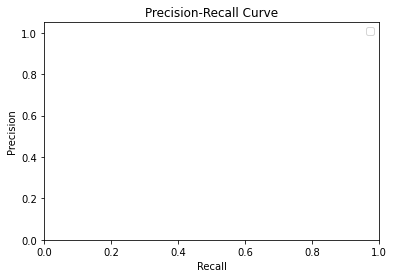

In [ ]:
precisions = []
recalls = []
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

def print_report(Y_true, model_pred_proba):
    for i in threshold_list:
        print ('\n******** For i = {} ******'.format(i))
        Y_test_pred = model_pred_proba.apply(lambda x: 1 if x>i else 0)
        precision, recall, _ = precision_recall_curve(Y_true,Y_test_pred)
        precisions.append(precision)
        recalls.append(recall)
        
plt.plot(recalls, precisions, 'b', linestyle='-')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("Precision-Recall Curve")
plt.legend(loc='best')
plt.show()

LSTM MODEL


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from tensorflow.keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import roc_auc_score, precision_score
from sklearn import metrics 
import numpy as np
from itertools import chain

In [ ]:
train = pd.read_csv("kenya_train")
val = pd.read_csv("kenya_val")
test = pd.read_csv("kenya_test")

In [ ]:
train.head()

,Unnamed: 0,X1_1,X2_1,X3_1,X4_1,X5_1,X6_1,X7_1,X8_1,X9_1,X10_1,X11_1,Status
0,0,0.53,0.81,4.15,11.71,0.38,2.49,0.83,0.07,1.18,-0.09,0.21,0
1,0,0.73,0.68,4.13,6.87,0.63,2.24,0.79,0.13,0.49,-0.02,0.14,0
2,0,0.71,0.68,5.88,5.18,0.62,1.41,0.67,-0.15,0.40,0.21,0.12,0
3,0,1.09,1.07,9.87,6.72,0.93,0.00,0.47,-0.33,0.49,-0.24,0.26,1
4,0,1.50,1.21,9.24,7.38,1.23,0.00,0.49,-0.34,0.50,-0.44,0.33,1


In [ ]:
#drop unnecessary column
train.drop(['Unnamed: 0'], axis = 1, inplace = True)
val.drop(['Unnamed: 0'], axis = 1, inplace = True)
test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
train.shape

(220, 12)

In [ ]:
y_train = train.iloc[:, -1]
x_train = train.iloc[:, :11]
#oversample the positive classes by SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
#normalise the data
x_train = MinMaxScaler().fit_transform(x_train) 
y_train = y_train.astype('int')
#reshape the data to 3 dimensions by num of rows, num of quarters and num of columns
x_train = x_train.reshape(x_train.shape[0], 1, 11)

In [ ]:
y_val = val.iloc[:, -1]
x_val = val.iloc[:, :11]
x_val = MinMaxScaler().fit_transform(x_val) 
y_val = y_val.astype('int')
x_val = x_val.reshape(x_val.shape[0], 1, 11)

In [ ]:
y_test = test.iloc[:, -1]
x_test = test.iloc[:, :11]
x_test = MinMaxScaler().fit_transform(x_test) 
y_test = y_test.astype('int')
x_test = x_test.reshape(x_test.shape[0], 1, 11)

In [ ]:
pd.DataFrame(y_train).Status.value_counts()

0    135
1    135
Name: Status, dtype: int64

In [ ]:
pd.DataFrame(y_val).Status.value_counts()

0    110
1     55
Name: Status, dtype: int64

In [ ]:
pd.DataFrame(y_test).Status.value_counts()

0    90
1    20
Name: Status, dtype: int64

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 1, 128)            71680     
                                                                 
 dropout_12 (Dropout)        (None, 1, 128)            0         
                                                                 
 lstm_18 (LSTM)              (None, 1, 64)             49408     
                                                                 
 dropout_13 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_19 (LSTM)              (None, 16)                5184      
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 1)                

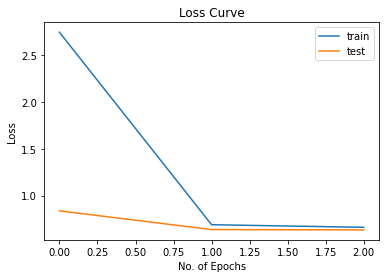

In [ ]:
def buildManyToOneModel(shape):
    model = Sequential()
    model.add(LSTM(128, input_shape=(shape[1], shape[2]), return_sequences = True))
    model.add(Dropout(0.3))
    model.add(LSTM(64, return_sequences = True, activation = 'tanh'))
    model.add(Dropout(0.3))
    model.add(LSTM(16, activation = 'tanh'))
  
    model.add(Dense(16, activation = 'tanh'))
    # output shape: (1, 1)
    model.add(Dense(1, activation = 'tanh'))
              
    opt = tf.keras.optimizers.Adam(learning_rate= 1e-2)
    model.compile(loss="binary_crossentropy", optimizer=opt)
    model.summary()
    return model

model = buildManyToOneModel(x_train.shape)
history = model.fit(x_train, y_train, epochs=3, batch_size=20, validation_data=(x_val, y_val))

#loss curve
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss Curve')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
lstm_pred = model.predict(x_val)
lstm_pred = np.ndarray.tolist(lstm_pred)
#remove the list 
lstm_pred = list(chain.from_iterable(lstm_pred))
len(lstm_pred)

6/6 [==============================] - 1s 4ms/step


165

In [ ]:
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for th in threshold:
    lstm_pred_int = [1 if i >= th else 0 for i in lstm_pred]
    precision = metrics.precision_score(y_val, lstm_pred_int)
    recall = metrics.recall_score(y_val, lstm_pred_int)
    F2_score = metrics.fbeta_score(y_val, lstm_pred_int, beta = 2)
    area_under_roc = roc_auc_score(y_val, lstm_pred)

    print(f'\n******** For i = {th} ****** \n',
          f'Precision: {precision} \n',
          f'Recall: {recall} \n',
          f'F2_score: {F2_score} \n',
          f'ROC_AUC_Score: {area_under_roc}')
    lstm_pred_int = []


******** For i = 0.1 ****** 
 Precision: 0.3333333333333333 
 Recall: 1.0 
 F2_score: 0.7142857142857143 
 ROC_AUC_Score: 0.8528925619834712

******** For i = 0.2 ****** 
 Precision: 0.3333333333333333 
 Recall: 1.0 
 F2_score: 0.7142857142857143 
 ROC_AUC_Score: 0.8528925619834712

******** For i = 0.3 ****** 
 Precision: 0.3353658536585366 
 Recall: 1.0 
 F2_score: 0.7161458333333333 
 ROC_AUC_Score: 0.8528925619834712

******** For i = 0.4 ****** 
 Precision: 0.3673469387755102 
 Recall: 0.9818181818181818 
 F2_score: 0.7356948228882835 
 ROC_AUC_Score: 0.8528925619834712

******** For i = 0.5 ****** 
 Precision: 0.775 
 Recall: 0.5636363636363636 
 F2_score: 0.5961538461538461 
 ROC_AUC_Score: 0.8528925619834712

******** For i = 0.6 ****** 
 Precision: 1.0 
 Recall: 0.01818181818181818 
 F2_score: 0.02262443438914027 
 ROC_AUC_Score: 0.8528925619834712

******** For i = 0.7 ****** 
 Precision: 1.0 
 Recall: 0.01818181818181818 
 F2_score: 0.02262443438914027 
 ROC_AUC_Score: 0.85

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision = average_precision_score(y_val, lstm_pred)
print(average_precision)

0.7972378165902383


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


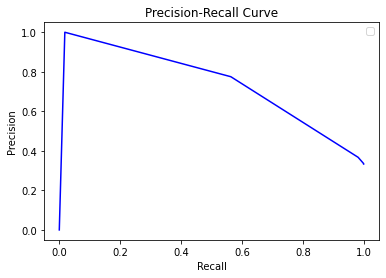

In [ ]:
precisions = []
recalls = []
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for th in threshold:
    lstm_pred_int = [1 if i >= th else 0 for i in lstm_pred]
    precision = metrics.precision_score(y_val, lstm_pred_int)
    recall = metrics.recall_score(y_val, lstm_pred_int)
    precisions.append(precision)
    recalls.append(recall)

plt.plot(recalls, precisions, 'b')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc='best')
plt.show()

In [ ]:
model.save('kenya_distress_lstm_model.h5')

In [ ]:
model = load_model('kenya_distress_lstm_model.h5')

In [ ]:
#predict on test_data
y_pred  = model.predict(x_test.reshape(x_test.shape[0], 1, 11))

4/4 [==============================] - 2s 4ms/step


In [ ]:
#test_data by different thresholds

threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for th in threshold:
    
    y_class = [1 if i >= th else 0 for i in y_pred] 
    precision = metrics.precision_score(y_test, y_class)
    recall = metrics.recall_score(y_test, y_class)
    F2_score = metrics.fbeta_score(y_test, y_class, beta = 2)
    area_under_roc = roc_auc_score(y_test, y_pred)

    print(f'\n******** For i = {th} ****** \n',
          f'Precision: {precision} \n',
          f'Recall: {recall} \n',
          f'F2_score: {F2_score} \n',
          f'ROC_AUC_Score: {area_under_roc}')


******** For i = 0.1 ****** 
 Precision: 0.37254901960784315 
 Recall: 0.95 
 F2_score: 0.7251908396946564 
 ROC_AUC_Score: 0.9377777777777778

******** For i = 0.2 ****** 
 Precision: 0.3958333333333333 
 Recall: 0.95 
 F2_score: 0.7421874999999999 
 ROC_AUC_Score: 0.9377777777777778

******** For i = 0.3 ****** 
 Precision: 0.48717948717948717 
 Recall: 0.95 
 F2_score: 0.7983193277310924 
 ROC_AUC_Score: 0.9377777777777778

******** For i = 0.4 ****** 
 Precision: 0.6538461538461539 
 Recall: 0.85 
 F2_score: 0.8018867924528301 
 ROC_AUC_Score: 0.9377777777777778

******** For i = 0.5 ****** 
 Precision: 0.7142857142857143 
 Recall: 0.75 
 F2_score: 0.7425742574257427 
 ROC_AUC_Score: 0.9377777777777778

******** For i = 0.6 ****** 
 Precision: 0.7222222222222222 
 Recall: 0.65 
 F2_score: 0.663265306122449 
 ROC_AUC_Score: 0.9377777777777778

******** For i = 0.7 ****** 
 Precision: 1.0 
 Recall: 0.65 
 F2_score: 0.6989247311827956 
 ROC_AUC_Score: 0.9377777777777778


In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
average_precision = average_precision_score(y_test, y_pred)
print(average_precision)

0.8718959091371865


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


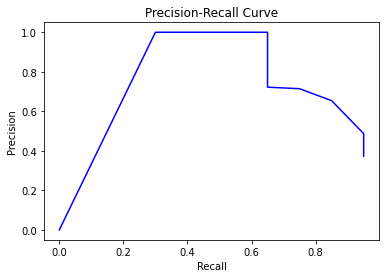

In [ ]:
precisions = []
recalls = []
threshold = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

for th in threshold:
    
    y_class = [1 if i >= th else 0 for i in y_pred] 
    precision = metrics.precision_score(y_test, y_class)
    recall = metrics.recall_score(y_test, y_class)
    precisions.append(precision)
    recalls.append(recall)

plt.plot(recalls, precisions, 'b')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()